# MODUL PyTorch (Python 3.12)

# Vorhersage des Ödometerversuches implementiert
Ziel war die Implementierung eines neuronalen Netzwerks zur Modellierung des Ödometerversuchs. Dabei wurden gegebene Input-Parameter verarbeitet, um Output-Parameter vorherzusagen.

#### Das Problem ist wie folgt definiert:
$$
\begin{array}{rcl}
    \sigma_{t+1} & = & \sigma_{t}+\Delta\sigma \\ \\
    \Delta\sigma & = & E_s\cdot \Delta\epsilon \\ 
    E_s & = & \frac{1+e_0}{C_c} \cdot \sigma_t
\end{array}
\hspace{2cm}
\begin{array}{l}
    \textbf{Annahmen:} \\ \\
    \text{Startwert d. Iteration: } \sigma_t = 1,00 \\ 
    e_0 = 1,00 \\ 
    C_c = 0,005 \\
    \Delta\epsilon = 0,0005
\end{array}
$$

<br> 

Um das Model zu testen werden wir folgende vorberechnete Werte verwenden: `Input` { $\sigma_t$ }, `Output` { $E_s$ }.
<br>
### Variablendeklaration
- $\sigma_t$ = `sigma_t`
- $\Delta\epsilon$ = `delta_epsilon`
- $\sigma_{t+1}$ = `delta_sigma
- $E_s$ = `e_s`

# Generate random trainingsdata

In [1]:
from random import randint

# Define input and output parameters
input_str = "sigma_t"
output_str = "e_s"

# Defining problem parameters
delta_epsilon=0.0005
C_c = 0.005
e_0 = 1.0
amount_trainings_data = 100

# Data preparation for 
oedo_para = {
    'max_n': 1,
    'e_0': e_0,
    'C_c': C_c,
    'delta_epsilon' : delta_epsilon,
}

# Load problem and generate trainings data from 00_problem_settings_functions.ipynb

Available classes: `Oedometer` <br>
Returns `list_input` and `list_output` as type `list` <br>
Returns `tensor_input` and `tensor_output` as type `tensor`

In [2]:
%run 00_problem_settings_functions.ipynb

# Loads:
# Oedometer class

# Returns
# list_input: list
# list_output: list

# tensor_input: tensor
# tensor_output: tensor

# Show trainingsdata (List) as DataFrame
Type `list`: `list_input` and `list_output`

In [3]:
import pandas as pd
from pandas import DataFrame

pd.DataFrame([[input_str] + list_input, [output_str] + list_output])

,0,1,2,3,4,5,6,7,8,9,...,91,92,93,94,95,96,97,98,99,100
0,sigma_t,34.0,40.0,3.0,48.0,25.0,26.0,27.0,4.0,41.0,...,13.0,29.0,17.0,48.0,1.0,16.0,38.0,35.0,45.0,50.0
1,e_s,13600.0,16000.0,1200.0,19200.0,10000.0,10400.0,10800.0,1600.0,16400.0,...,5200.0,11600.0,6800.0,19200.0,400.0,6400.0,15200.0,14000.0,18000.0,20000.0


# Show trainingsdata (Tensor) as DataFrame
Type `tensor`: `tensor_input` and `tensor_output`

In [4]:
tensor_input_df = pd.DataFrame(torch.cat((tensor_input, tensor_output), dim=1), columns = [input_str, output_str])
tensor_input_df

,sigma_t,e_s
0,34.0,13600.0
1,40.0,16000.0
2,3.0,1200.0
3,48.0,19200.0
4,25.0,10000.0
...,...,...
95,16.0,6400.0
96,38.0,15200.0
97,35.0,14000.0
98,45.0,18000.0


# Define SimpleRegressor Model

In [5]:
import torch.nn as nn
import torch.optim as optim


class SimpleRegressor(nn.Module):
    def __init__(self):
        super(SimpleRegressor, self).__init__()
        self.model = nn.Sequential(
            nn.Linear(1, 16),
            nn.ReLU(),
            nn.Linear(16, 16),
            nn.ReLU(),
            nn.Linear(16, 1)
        )

    def forward(self, x):
        return self.model(x)

model = SimpleRegressor()

# Training

In [6]:
loss_fn = nn.MSELoss()
optimizer = optim.Adam(model.parameters(), lr=0.01)

epochs = 5000
loss_history = []
for epoch in range(epochs):
    model.train()
    optimizer.zero_grad()
    pred = model(tensor_input)
    loss = loss_fn(pred, tensor_output)
    loss.backward()
    loss_history.append(loss.item())
    optimizer.step()

    if epoch % 100 == 0:
        print(f"Epoch {epoch}: Loss = {loss.item():.6f}")

Epoch 0: Loss = 164388352.000000
Epoch 100: Loss = 59732164.000000
Epoch 200: Loss = 23044.695312
Epoch 300: Loss = 18864.078125
Epoch 400: Loss = 17792.021484
Epoch 500: Loss = 16619.511719
Epoch 600: Loss = 15380.528320
Epoch 700: Loss = 14104.119141
Epoch 800: Loss = 12816.188477
Epoch 900: Loss = 11539.077148
Epoch 1000: Loss = 10292.585938
Epoch 1100: Loss = 9093.348633
Epoch 1200: Loss = 7955.276367
Epoch 1300: Loss = 6889.467285
Epoch 1400: Loss = 5904.148926
Epoch 1500: Loss = 5004.942383
Epoch 1600: Loss = 4194.889648
Epoch 1700: Loss = 3474.635010
Epoch 1800: Loss = 2842.881348
Epoch 1900: Loss = 2296.215576
Epoch 2000: Loss = 1829.837158
Epoch 2100: Loss = 1437.820923
Epoch 2200: Loss = 1113.266724
Epoch 2300: Loss = 848.738770
Epoch 2400: Loss = 636.695984
Epoch 2500: Loss = 469.596405
Epoch 2600: Loss = 340.248871
Epoch 2700: Loss = 241.974396
Epoch 2800: Loss = 168.754547
Epoch 2900: Loss = 115.303314
Epoch 3000: Loss = 77.102959
Epoch 3100: Loss = 50.410179
Epoch 3200: L

# Loss function

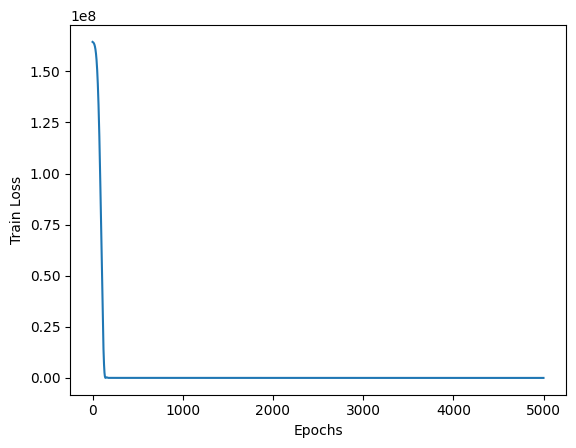

In [7]:
import matplotlib.pyplot as plt

plt.plot(loss_history, label="Loss")
plt.xlabel('Epochs')
plt.ylabel('Train Loss')
plt.show()

In [8]:
pred_input = torch.tensor([1.0], dtype=torch.float).unsqueeze(-1) 

model.eval()
with torch.no_grad():
    pred = model(pred_input)

print(pred)

tensor([[400.0122]])


# Plot of stress–strain curve

<>:31: SyntaxWarning: invalid escape sequence '\s'
<>:32: SyntaxWarning: invalid escape sequence '\s'
<>:38: SyntaxWarning: invalid escape sequence '\s'
<>:38: SyntaxWarning: invalid escape sequence '\D'
<>:31: SyntaxWarning: invalid escape sequence '\s'
<>:32: SyntaxWarning: invalid escape sequence '\s'
<>:38: SyntaxWarning: invalid escape sequence '\s'
<>:38: SyntaxWarning: invalid escape sequence '\D'
/tmp/ipykernel_6943/2538788619.py:31: SyntaxWarning: invalid escape sequence '\s'
  plt.scatter(sigma_true, e_s_pred, label='$E_{s,pred}$-$\sigma_{true}$').set_color("red")
/tmp/ipykernel_6943/2538788619.py:32: SyntaxWarning: invalid escape sequence '\s'
  plt.scatter(sigma_pred, e_s_pred, label='$E_{s,pred}$-$\sigma_{pred}$')
/tmp/ipykernel_6943/2538788619.py:38: SyntaxWarning: invalid escape sequence '\s'
  plt.title(f'Spannungsdehnungs Verlauf mit $\sigma_0={start_sigma}$ und $\Delta\epsilon=0.0005$')
/tmp/ipykernel_6943/2538788619.py:38: SyntaxWarning: invalid escape sequence '\D'


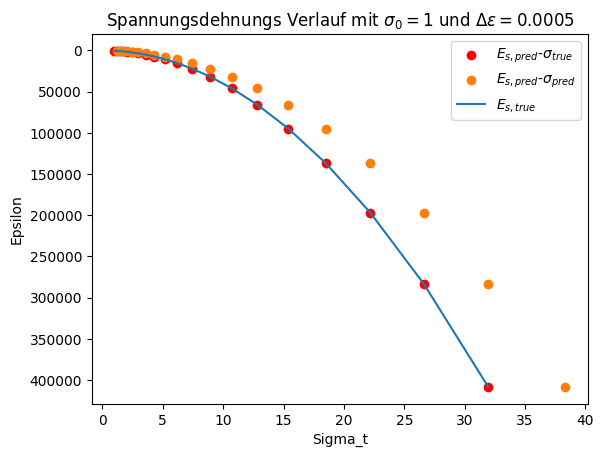

In [10]:
def plot_result(iterations=20, start_sigma=1, delta_epsilon=0.0005):
    oedo_para = {
    'max_n': iterations,
    'e_0': 1.0,
    'C_c': 0.005,
    'delta_epsilon' : delta_epsilon,
    'sigma_t' : start_sigma,
    }

    oedo = Oedometer(**oedo_para)
    sigma_true = oedo.sigma_t
    e_s_true = oedo.e_s
    
    # print(sigma_true)
    # print(e_s_true)
    model.eval()
    e_s_pred = []
    e_s_true_plot = []
    sigma_t = start_sigma
    sigma_pred = []
    with torch.no_grad():
        for i in range(iterations):
            sigma_true_tensor = torch.tensor(sigma_true[i], dtype=torch.float).unsqueeze(-1) 
            pred = model(sigma_true_tensor)
            e_s_pred.append(pred * sigma_true[i])
            e_s_true_plot.append(e_s_true[i] * sigma_true[i])

            sigma_t = sigma_t + pred * delta_epsilon
            sigma_pred.append(sigma_t)
    # Plot der Losskurve
    plt.scatter(sigma_true, e_s_pred, label='$E_{s,pred}$-$\sigma_{true}$').set_color("red")
    plt.scatter(sigma_pred, e_s_pred, label='$E_{s,pred}$-$\sigma_{pred}$')
    plt.plot(sigma_true, e_s_true_plot, label='$E_{s,true}$')

    plt.gca().invert_yaxis()
    plt.xlabel('$\sigma_t$')
    plt.ylabel('$\epsilon$')
    plt.title(f'Spannungsdehnungs Verlauf mit $\sigma_0={start_sigma}$ und $\Delta\epsilon=0.0005$')
    plt.legend()
    plt.show()
    
plot_result()